In [1]:
import nltk
from os import getcwd
import pandas as pd
from nltk.corpus import twitter_samples
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.append('../')
from text_preprocessing import build_word_frequencies, process_tweet



## Load NLTK Sample Dataset

In [5]:
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

tweets = all_positive_tweets + all_negative_tweets
labels = np.append(np.ones((len(all_positive_tweets),1)), np.zeros((len(all_negative_tweets),1)), axis = 0)

train_pos = all_positive_tweets[:4000]
train_neg = all_negative_tweets[:4000]

train_x = train_pos + train_neg
print(f'Number of tweets {len(train_x)}')


Number of tweets 8000


## Load the extracted features

In [7]:
data = pd.read_csv('./data/logistic_features.csv')
data.head(10)

,bias,positive,negative,sentiment
0,1.0,3020.0,61.0,1.0
1,1.0,3573.0,444.0,1.0
2,1.0,3005.0,115.0,1.0
3,1.0,2862.0,4.0,1.0
4,1.0,3119.0,225.0,1.0
5,1.0,2955.0,119.0,1.0
6,1.0,3934.0,538.0,1.0
7,1.0,3162.0,276.0,1.0
8,1.0,628.0,189.0,1.0
9,1.0,264.0,112.0,1.0


In [8]:
X = data[['bias','positive','negative']].values
Y = data['sentiment'].values

print(X.shape)
print(X)

(8000, 3)
[[1.000e+00 3.020e+03 6.100e+01]
 [1.000e+00 3.573e+03 4.440e+02]
 [1.000e+00 3.005e+03 1.150e+02]
 ...
 [1.000e+00 1.440e+02 7.830e+02]
 [1.000e+00 2.050e+02 3.890e+03]
 [1.000e+00 1.890e+02 3.974e+03]]


## Load pretrained Logistic Regression model

In [9]:
theta = [6.03518871e-08, 5.38184972e-04, -5.58300168e-04]

## Plot samples in a scatter plot
The vector theta represents a plane that split our feature space into two parts. Samples located over that plane are considered positive, and samples located under that plane are considered negative. Remember that we have a 3D feature space, i.e., each tweet is represented as a vector comprised of three values: `[bias, positive_sum, negative_sum]`, always having `bias = 1`. 

If we ignore the bias term, we can plot each tweet in a cartesian plane, using `positive_sum` and `negative_sum`. In the cell below, we do precisely this. Additionally, we color each tweet, depending on its class. Positive tweets will be green and negative tweets will be red.

Text(0, 0.5, 'Negative')

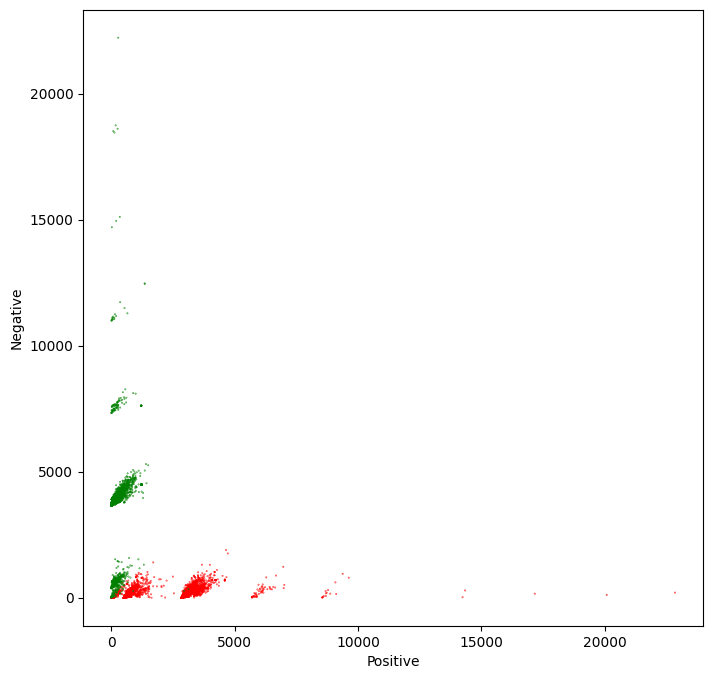

In [11]:
fig, ax = plt.subplots(figsize = (8,8))

colors = ['green', 'red']
ax.scatter(X[:,1], X[:,2], c=[colors[int(k)] for k in Y], s = 0.1)
plt.xlabel("Positive")
plt.ylabel("Negative")

From the plot, it is evident that the features that we have chosen to represent tweets as numerical vectors allow an almost perfect separation between positive and negative tweets. So you can expect a very high accuracy for this model! 

## Plot the model alongside the data

We will draw a gray line to show the cutoff between the positive and negative regions. In other words, the gray line marks the line where $$ z = \theta * x = 0.$$
To draw this line, we have to solve the above equation in terms of one of the independent variables.

$$ z = \theta * x = 0$$
$$ x = [1, pos, neg] $$
$$ z(\theta, x) = \theta_0+ \theta_1 * pos + \theta_2 * neg = 0 $$
$$ neg = (-\theta_0 - \theta_1 * pos) / \theta_2 $$

The red and green lines that point in the direction of the corresponding sentiment are calculated using a perpendicular line to the separation line calculated in the previous equations (neg function). It must point in the same direction as the derivative of the Logit function, but the magnitude may differ. It is only for a visual representation of the model. 

$$direction = pos * \theta_2 / \theta_1$$

In [14]:
def neg(theta, pos):
    return(-theta[0] - pos * theta[1]) / theta[2]

def direction(theta, pos):
    return pos * theta[2] / theta[1]

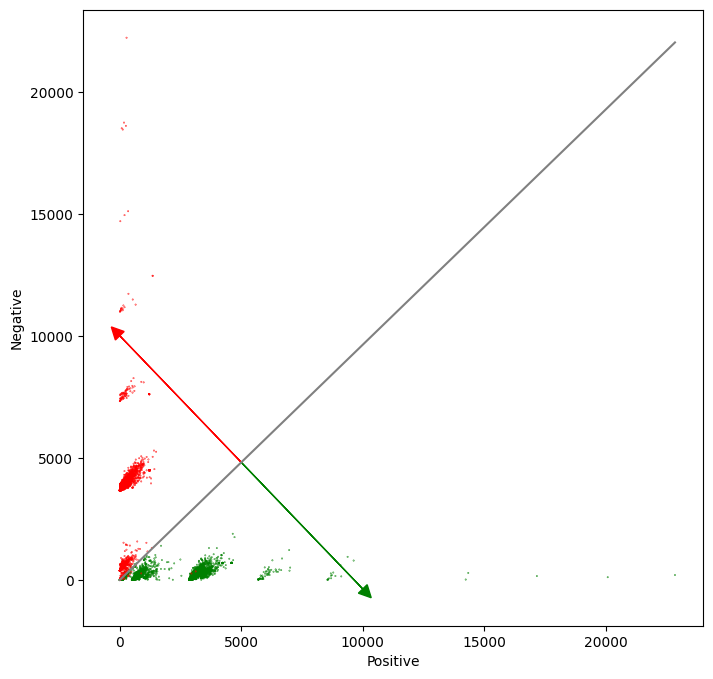

In [15]:
fig, ax = plt.subplots(figsize = (8,8))

colors = ['red', 'green']

ax.scatter(X[:,1], X[:,2], c=[colors[int(k)] for k in Y], s = 0.1)
plt.xlabel("Positive")
plt.ylabel("Negative")

maxpos = np.max(X[:,1])

offset = 5000

ax.plot([0, maxpos], [neg(theta,0), neg(theta, maxpos)], color = 'gray')

# Plot a green line pointing to the positive direction
ax.arrow(offset, neg(theta, offset), offset, direction(theta, offset), head_width=500, head_length=500, fc='g', ec='g')
# Plot a red line pointing to the negative direction
ax.arrow(offset, neg(theta, offset), -offset, -direction(theta, offset), head_width=500, head_length=500, fc='r', ec='r')

plt.show()